Just like a dendrogram, you can represent a **hierarchy** by **circular packing**. The biggest circle represents the highest level of hierarchy and it has several circles representing nodes of level 1 and they contain smaller circles of level 2 and so on.. You can create a circular packing chart to represent multiple levels of hierarcy by creating a data like in this example. It shows the population of world divided in continent and country.

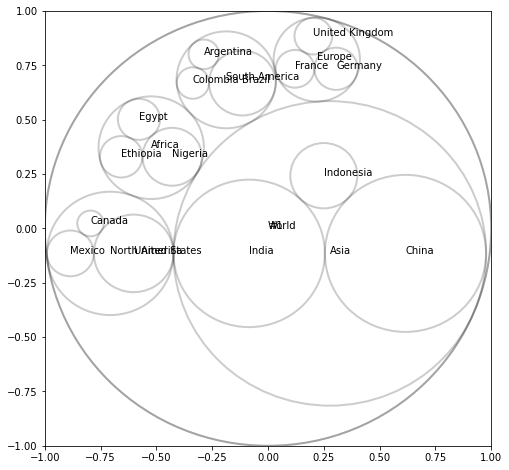

In [76]:
# import libraries
from pprint import pprint
import circlify
import matplotlib.pyplot as plt

# create data 
data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]

# create packed circles with given data
circles = circlify.circlify(data, show_enclosure=True, target_enclosure=circ.Circle(x=0, y=0, r=1))

# print circles
#pprint(circles)

# draw a graph of the packed circles
circlify.bubbles(circles=circles) 